In [1]:
import pandas as pd

Lectura de un CSV con inputación de nombres de columnas

In [2]:
df = pd.read_csv("demo.csv",names=["user","amount","id","dates"])

Creación de una columna literal

In [3]:
df["dummy_col"] = 2

In [6]:
df.head(1)

,user,amount,id,dates,dummy_col
0,Sylvester Sykes,9014.58,1009014458,2018-10-24,2


Creación de una columna en función alguna otra transformación 

In [7]:
from random import random

a_func = lambda x : x*random()

df["random_amount"] = df.amount.apply(a_func)

Separamos el nombre del apellido

In [37]:
df["nombre"]=df["user"].str.split(" ").apply(lambda x : x[0])

df["apellido"]=df["user"].str.split(" ").apply(lambda x : x[1])

Sobre escribir la columna id con la misma pero al revés

In [40]:
df["id"] = df["id"].apply(lambda  x: str(x)[::-1])

Hemos usado apply , ahora vamos a usar appply MAP

In [60]:
import numpy as np

df1 = df.applymap(lambda x : np.nan if random()>0.5 else x)

In [72]:
df1.dropna()

,user,amount,id,dates
6,Kyle Mckee,10657.29,1.009014e+09,2018-10-24
7,Nehru Woodward,8833.97,1.008834e+09,2018-10-24
20,Joshua Weeks,15987.05,1.015987e+09,2018-10-24
28,Burton Cain,9958.63,1.009959e+09,2019-01-02
54,Jakeem Avery,8309.07,1.008426e+09,2018-09-23
72,Demetrius Schwart,79030.70,1.007903e+09,2019-01-31


Seteamos el index de forma no numérica sino nombre de usuario

In [6]:
df.set_index(df.columns[0])

,amount,id,dates
user,,,
Sylvester Sykes,9014.58,1009014458,2018-10-24
Brandon Wheeler,8590.93,1006789262,2018-10-24
Wing Roth,25660.92,1025660292,2018-10-24
Zachary Roth,9178.23,1009178723,2018-10-24
Otto Barron,6754.46,1006754446,2018-10-24
...,...,...,...
Jakeem Bowers,21281.47,1021281747,2018-11-29
Ross Pittman,72924.95,8000022770,2018-07-23
Nathaniel Sanford,73541.17,1007354117,2018-08-05


Convertir dato tipo object a fecha

In [7]:
df.dtypes

user       object
amount    float64
id          int64
dates      object
dtype: object

Convertir columna a fecha
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [8]:
df.dates = pd.to_datetime(df.dates, format = '%Y-%m-%d')

In [9]:
df.dtypes

user              object
amount           float64
id                 int64
dates     datetime64[ns]
dtype: object

Slicing

In [10]:
df[:-1].head(1)

,user,amount,id,dates
0,Sylvester Sykes,9014.58,1009014458,2018-10-24


localization by label
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [15]:
df.head(2)

,user,amount,id,dates,dummy_col,random_amount
0,Sylvester Sykes,9014.58,1009014458,2018-10-24,2,8863.120848
1,Brandon Wheeler,8590.93,1006789262,2018-10-24,2,2462.809200


In [27]:
df.loc[df.user =="Sylvester Sykes"]

,user,amount,id,dates,dummy_col,random_amount
0,Sylvester Sykes,9014.58,1009014458,2018-10-24,2,8863.120848


In [13]:
df[-1:]

,user,amount,id,dates
98,Christopher Morto,25694.88,8000061942,2019-12-08


Apply a function to a serie

In [15]:
def upperIfVocal(valor):

    if (valor[0] == "O"):
        return valor.upper()

    return valor

In [16]:
df.loc[:,'user'].apply(upperIfVocal)

0       Sylvester Sykes
1       Brandon Wheeler
2             Wing Roth
3          Zachary Roth
4           OTTO BARRON
            ...        
94        Jakeem Bowers
95         Ross Pittman
96    Nathaniel Sanford
97        Drew Cummings
98    Christopher Morto
Name: user, Length: 99, dtype: object

In [17]:
# applpymap

In [ ]:
df.loc[   0:5    ,['user','id']]
#.apply( lambda x : x.upper()).head()

,user,id
0,Sylvester Sykes,1009014458
1,Brandon Wheeler,1006789262
2,Wing Roth,1025660292
3,Zachary Roth,1009178723
4,Otto Barron,1006754446
5,Gavin Mcleod,1010447375


In [ ]:
df["amount"]  =  df["amount"]*-1

In [ ]:
df = df.set_index(df.user).drop("user"  , axis=1)

In [ ]:
df.filter(like='ford', axis=0)

,amount,id,dates
user,,,
Holmes Crawford,8836.48,8000069544,2019-01-02
Nathaniel Sanford,73541.17,1007354117,2018-08-05


In [ ]:
df = pd.read_csv("demo.csv",names=["user","amount","id","dates"])

In [ ]:
df["user2"] = df["user"]

Máscara

In [ ]:
df.loc[df["user"].str.contains("ford")    ]

,user,amount,id,dates
37,Holmes Crawford,8836.48,8000069544,2019-01-02
96,Nathaniel Sanford,73541.17,1007354117,2018-08-05


In [ ]:
df.user2.filter(like='ford', axis=0)

Series([], Name: user2, dtype: object)

In [ ]:
df1 = df.loc[df["dates"] == "2018-10-24"].reset_index(drop=True)
df2 = df.loc[df["dates"] == "2018-11-29"].reset_index(drop=True)

In [ ]:
pd.concat(  [df1, df2]   ,axis=1 ).reset_index(drop=True)

In [ ]:
df_unido = pd.concat([df1, df2]).reset_index(drop=True)

JOIN

In [ ]:
df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})

In [ ]:
df

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [ ]:
other

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [ ]:
df.join(other, lsuffix='_caller', rsuffix='_other' ).head()

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN


In [ ]:
df.merge(other ,  on="key" , how="outer").head()

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN


In [ ]:
df.join(other.set_index('key') , on="key").head()

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN


https://www.geeksforgeeks.org/what-is-the-difference-between-join-and-merge-in-pandas/

In [ ]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [ ]:
df1v2 = df1.rename(columns={"lkey": "rkey", "value": "value"})

In [ ]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [ ]:
#data=df1.merge(df2, left_on='lkey', right_on='rkey')

data = df1v2.merge(df2, on = "rkey", suffixes=('_v1', '_v2'))
data.head(10)

,rkey,value_v1,value_v2
0,foo,1,5
1,foo,1,8
2,foo,5,5
3,foo,5,8
4,bar,2,6
5,baz,3,7


GROUP BY

In [ ]:
df = pd.read_csv("demo.csv",names=["user","amount","id","dates"])

In [22]:
df["id"]   = df["id"].apply(lambda x : str(x)[:4])

In [23]:
df.groupby("id").count()

,user,amount,dates
id,,,
1000,1,1,1
1001,1,1,1
1006,16,16,16
1007,14,14,14
1008,17,17,17
1009,18,18,18
1010,4,4,4
1015,1,1,1
1017,1,1,1


# Pandas Explode

In [8]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'A': [[0, 1, 2], 'foo', [], [3, 4]],
                   'B': 1,
                   'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]})

In [9]:
df.head()

,A,B,C
0,"[0, 1, 2]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [12]:
df.explode('A').explode('C')

,A,B,C
0,0,1,a
0,0,1,b
0,0,1,c
0,1,1,a
0,1,1,b
0,1,1,c
0,2,1,a
0,2,1,b
0,2,1,c
1,foo,1,NaN


In [15]:
#df.explode('A').explode('C')

In [17]:
import numpy as np
import pandas as pd

In [46]:
lista1 = [4,6,7,3,4,2,1,4]
lista2 = [5,6,7,3,9,1,7,2]

data = zip(lista1,lista2)

In [47]:
df = pd.DataFrame(data,columns=["A","B"] )

In [52]:
np.concatenate( (df.A , df.B) ).tolist()

[4, 6, 7, 3, 4, 2, 1, 4, 5, 6, 7, 3, 9, 1, 7, 2]

In [26]:
df["C"]   = np.where(  df["B"] > df["A"]  , 0 ,1)

In [30]:
np.where(  df["B"] > df["A"]  , 0 ,1)

array([0, 1, 1, 1, 0, 1, 0, 1])

In [31]:
df["B"] > df["A"] 

0     True
1    False
2    False
3    False
4     True
5    False
6     True
7    False
dtype: bool

In [32]:
import numpy as np

In [33]:
x = np.linspace(1,100, 1000)

y = np.sin(x)

In [38]:
y

array([ 0.84147098,  0.89079835,  0.93138468,  0.9628317 ,  0.98483084,
        0.99716623,  0.99971683,  0.99245762,  0.97545982,  0.94889022,
        0.91300955,  0.86816988,  0.81481121,  0.75345713,  0.68470967,
        0.60924344,  0.52779894,  0.44117537,  0.35022272,  0.25583347,
        0.15893384,  0.06047465, -0.03857795, -0.137252  , -0.23457926,
       -0.32960468, -0.42139582, -0.50905198, -0.59171301, -0.66856781,
       -0.73886221, -0.80190646, -0.85708193, -0.90384719, -0.94174337,
       -0.9703986 , -0.98953169, -0.99895492, -0.9985758 , -0.98839806,
       -0.96852156, -0.93914136, -0.90054574, -0.85311342, -0.79730985,
       -0.7336826 , -0.66285602, -0.5855251 , -0.50244865, -0.41444188,
       -0.32236836, -0.22713157, -0.12966603, -0.03092812,  0.06811327,
        0.16648629,  0.26322564,  0.35738207,  0.44803166,  0.53428489,
        0.6152954 ,  0.69026826,  0.7584678 ,  0.81922479,  0.87194307,
        0.91610532,  0.9512782 ,  0.97711657,  0.99336688,  0.99

In [34]:
import matplotlib.pyplot as plt

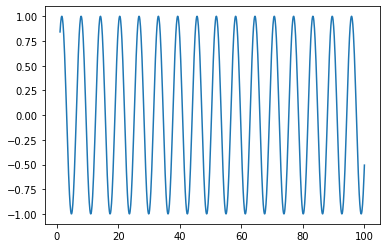

In [36]:
plt.plot(x,y)

In [44]:
x = np.array([1,2,3,3,3,3,3,3,3,3,3,5,6])

In [45]:
np.unique(x)

array([1, 2, 3, 5, 6])

In [1]:
import pandas as pd
import numpy as np


In [11]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: np.nan, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

In [13]:
df

,A,B,C
0,a,NaN,2
1,b,3.0,4
2,c,5.0,6


In [19]:
df["B"].isnull()

0     True
1    False
2    False
Name: B, dtype: bool

In [25]:
df.loc[~df["B"].isnull()]

,A,B,C
1,b,3.0,4
2,c,5.0,6


In [5]:
pd.melt(df, id_vars=['A'], value_vars=['B','C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [18]:
df = pd.DataFrame({'x': [1,2]})


In [20]:
df

,x
0,1
1,2


In [21]:
df_sub = df[0:1]
df_sub.x = -1

C:\Users\marco\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
df

,x
0,-1
1,2


In [24]:
df_sub_copy = df[0:1].copy()
df_sub_copy.x = -1

In [4]:
import pandas as pd
import numpy as np

In [5]:
df1 = pd.DataFrame(np.random.randn(6, 4),
                   index=list('abcdef'),
                   columns=list('ABCD'))

In [6]:
mask = pd.array([True, False, True, False, pd.NA, False], dtype="boolean")

In [8]:
df1

,A,B,C,D
a,-0.004919,2.108735,-0.041675,-0.482996
b,-0.441433,0.579159,0.544765,-0.061695
c,0.272412,0.957367,0.216186,-1.161454
d,0.079649,1.176277,-0.360310,-1.263106
e,-1.466301,1.347158,0.435418,-1.203003
f,-0.176468,0.754654,-0.659564,1.031708


In [7]:
df1[mask]

,A,B,C,D
a,-0.004919,2.108735,-0.041675,-0.482996
c,0.272412,0.957367,0.216186,-1.161454


In [7]:
import pandas as pd

In [11]:
df1 = pd.read_csv(r"C:\Users\marco\Documents\Demosss\color_ojos.csv",sep=";")
df2 = pd.read_csv(r"C:\Users\marco\Documents\Demosss\color_pelo.csv",sep=";")

In [15]:
df3 = df1.merge(df2, on="PERSONA")

In [19]:
import random
random.seed(10)
data = pd.DataFrame({
    'Name' : ['Jack', 'Owen', 'Theodore', 'Aiden', 'Samuel', 'Joseph', 'John', 'David', 'Wyatt', 'Matthew'],
    'Team' : ['team_a', 'team_b', 'team_c']*3 +['team_a'],
    'Games' : random.sample(range(5, 34), 10),
    'January' : random.sample(range(1, 50), 10),
    'February' : random.sample(range(1, 50), 10),
    'March' : random.sample(range(1, 50), 10),
    'April' : random.sample(range(1, 50), 10),
    'May' : random.sample(range(1, 50), 10),
    'June' : random.sample(range(1, 50), 10),
    'July' : random.sample(range(1, 50), 10),
    'August' : random.sample(range(1, 50), 10),
    'September' : random.sample(range(1, 50), 10),
    'October' : random.sample(range(1, 50), 10),
    'November' : random.sample(range(1, 50), 10)
})
data.to_csv("team_samples.csv")

In [20]:
data

,Name,Team,Games,January,February,March,April,May,June,July,August,September,October,November
0,Jack,team_a,23,42,27,44,3,21,33,43,8,44,11,1
1,Owen,team_b,6,11,9,20,38,43,11,5,7,18,43,35
2,Theodore,team_c,18,3,39,43,1,36,15,35,29,10,42,46
3,Aiden,team_a,20,34,23,24,16,29,27,6,11,40,12,3
4,Samuel,team_b,33,32,25,9,9,28,16,10,13,34,46,22
5,Joseph,team_c,5,21,49,30,13,31,3,25,23,12,31,21
6,John,team_a,11,5,19,16,20,5,44,37,28,8,23,16
7,David,team_b,19,16,17,29,35,42,32,24,27,48,21,6
8,Wyatt,team_c,30,24,30,40,24,38,20,39,47,30,28,17
9,Matthew,team_a,13,47,12,25,46,49,39,45,16,20,15,29


In [21]:
data.melt(id_vars=['Name','Team','Games'], var_name='Month', value_name='Score').sample(10)

,Name,Team,Games,Month,Score
24,Samuel,team_b,33,March,9
108,Wyatt,team_c,30,November,17
86,John,team_a,11,September,8
67,David,team_b,19,July,24
8,Wyatt,team_c,30,January,24
95,Joseph,team_c,5,October,31
78,Wyatt,team_c,30,August,47
92,Theodore,team_c,18,October,42
47,David,team_b,19,May,42
3,Aiden,team_a,20,January,34


In [29]:
data

,Name,Team,Games,January,February,March,April,May,June,July,August,September,October,November
0,Jack,team_a,23,42,27,44,3,21,33,43,8,44,11,1
1,Owen,team_b,6,11,9,20,38,43,11,5,7,18,43,35
2,Theodore,team_c,18,3,39,43,1,36,15,35,29,10,42,46
3,Aiden,team_a,20,34,23,24,16,29,27,6,11,40,12,3
4,Samuel,team_b,33,32,25,9,9,28,16,10,13,34,46,22
5,Joseph,team_c,5,21,49,30,13,31,3,25,23,12,31,21
6,John,team_a,11,5,19,16,20,5,44,37,28,8,23,16
7,David,team_b,19,16,17,29,35,42,32,24,27,48,21,6
8,Wyatt,team_c,30,24,30,40,24,38,20,39,47,30,28,17
9,Matthew,team_a,13,47,12,25,46,49,39,45,16,20,15,29


In [30]:
data.set_index(['Name','Team','Games']).stack().reset_index().rename(columns={'level_3':'Month', 0:'Scores'})

,Name,Team,Games,Month,Scores
0,Jack,team_a,23,January,42
1,Jack,team_a,23,February,27
2,Jack,team_a,23,March,44
3,Jack,team_a,23,April,3
4,Jack,team_a,23,May,21
...,...,...,...,...,...
105,Matthew,team_a,13,July,45
106,Matthew,team_a,13,August,16
107,Matthew,team_a,13,September,20
108,Matthew,team_a,13,October,15


In [ ]:
df[df.apply(lambda x: x['name'].startswith(('A' , 'E','I','O','U')), axis=1)]
